**Downloading Kaggle data sets directly into Colab**

Install the kaggle python library

In [ ]:
! pip install kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Portofolio/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 80% 53.0M/66.0M [00:00<00:00, 198MB/s]
100% 66.0M/66.0M [00:00<00:00, 192MB/s]


# **Step 1: Import Necessary Libraries**
Description: This step imports essential libraries needed for data manipulation, visualization, and machine learning.

In [ ]:

! unzip /content/creditcardfraud.zip


Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


# **Step 2**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
print(data.head())  # Menampilkan beberapa baris pertama dari DataFrame

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
data = data.drop('Time', axis=1)

In [ ]:
numeric_columns = (list(data.loc[:, 'V1':'Amount']))

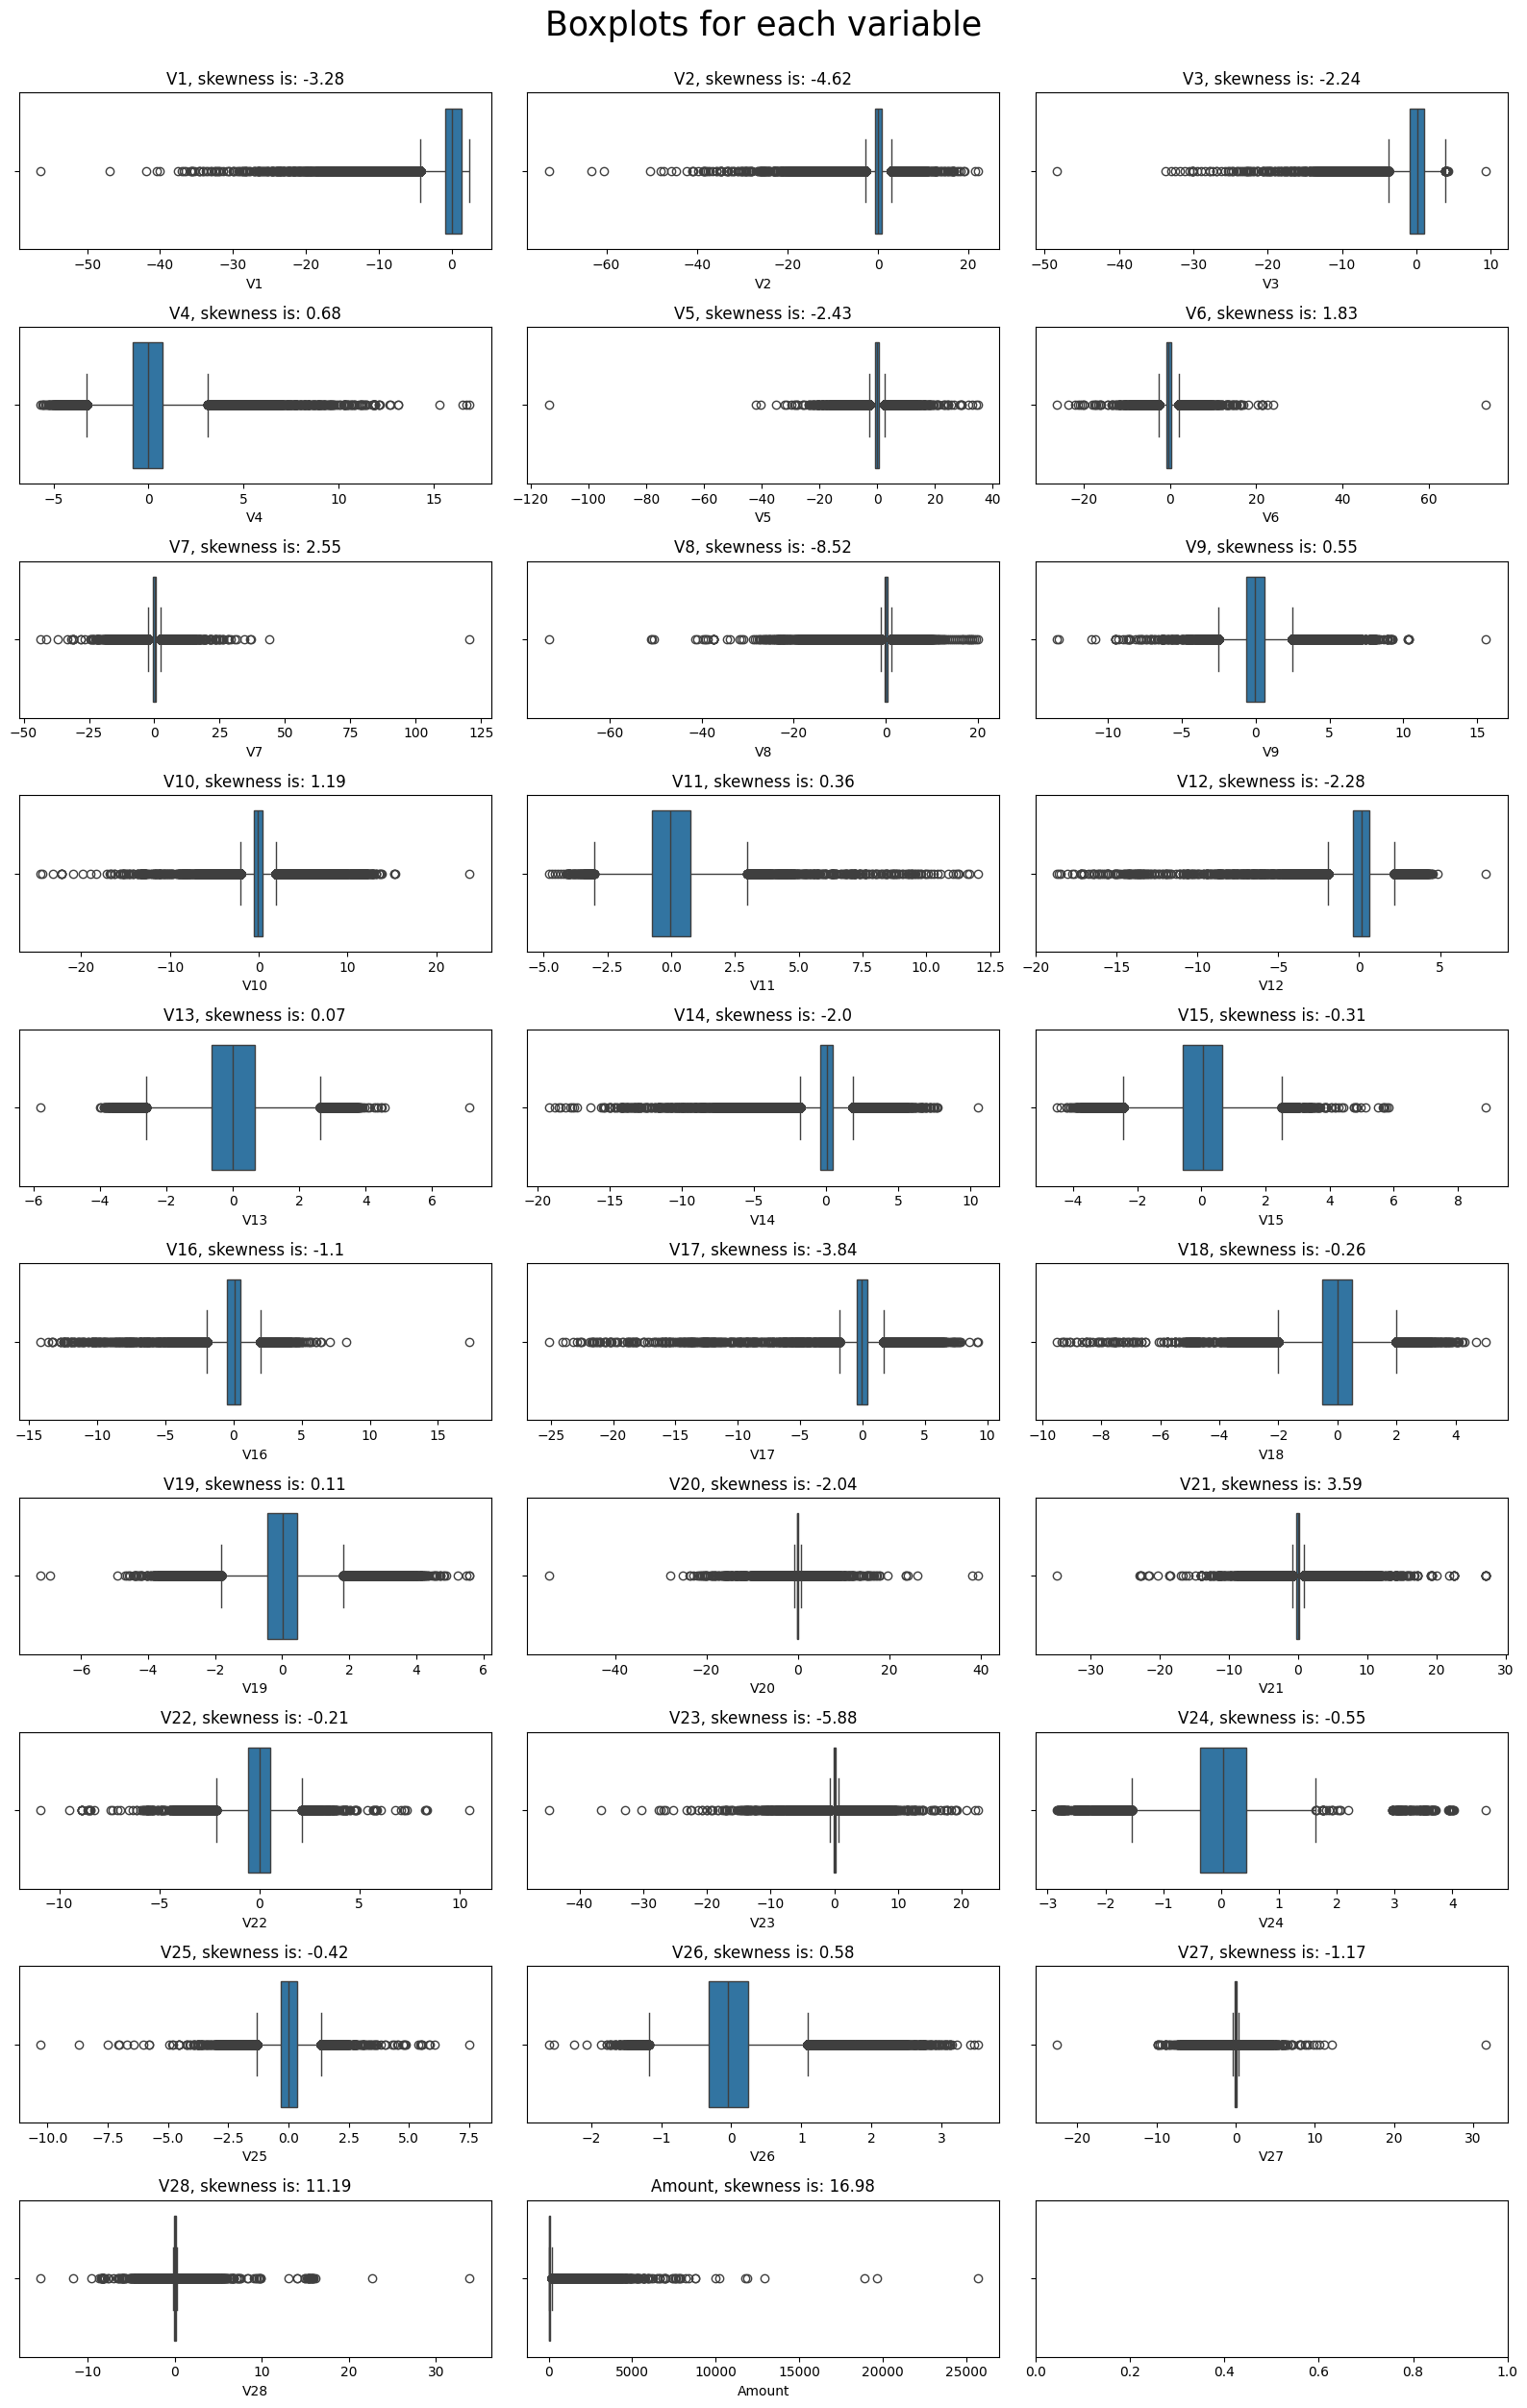

In [ ]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=data, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

# **Data Preprocessing**

# **Step 3: Check for Missing Values**

Description: Check for any missing values in the dataset, which could affect model performance.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Optionally remove rows with missing values
data_cleaned = data.dropna()  # Or, you could fill them with means/medians

Missing values per column:
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Step 4: Exploratory Data Analysis (Class Distribution)**
Description: Visualize the class distribution to understand the ratio of legitimate transactions to fraudulent ones.

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64



Text(0.5, 1.0, 'Class Distribution (0: Normal, 1: Fraud)')

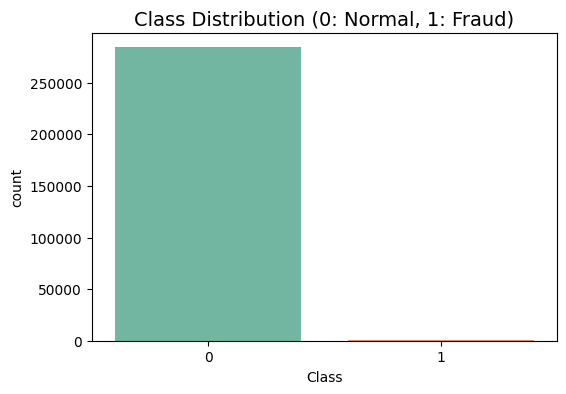

In [ ]:
# Count of each class (Legitimate and Fraud)
class_count = data['Class'].value_counts()
print(f"Class Distribution:\n{class_count}\n")

# Plot class distribution with counts and percentages
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette='Set2')
plt.title('Class Distribution (0: Normal, 1: Fraud)', fontsize=14)


In [ ]:
# Calculate percentages
total_transactions = len(data)
normal_percentage = (class_count[0] / total_transactions) * 100
fraud_percentage = (class_count[1] / total_transactions) * 100

print(f"Normal : {normal_percentage:.2f}%")
print(f"Fraudulent : {fraud_percentage:.2f}%")


Normal : 99.83%
Fraudulent : 0.17%


# **Data Transformation (Preprocessing)**
Description: This code scales the numerical features using Standardization, which transforms them into a standard normal distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Scale the numerical features
scaler = StandardScaler()
data_scaled = data_cleaned.copy()
data_scaled[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# **Step 5: Correlation Matrix**
Description: Visualize the correlation matrix to understand the relationship between different features in the dataset.

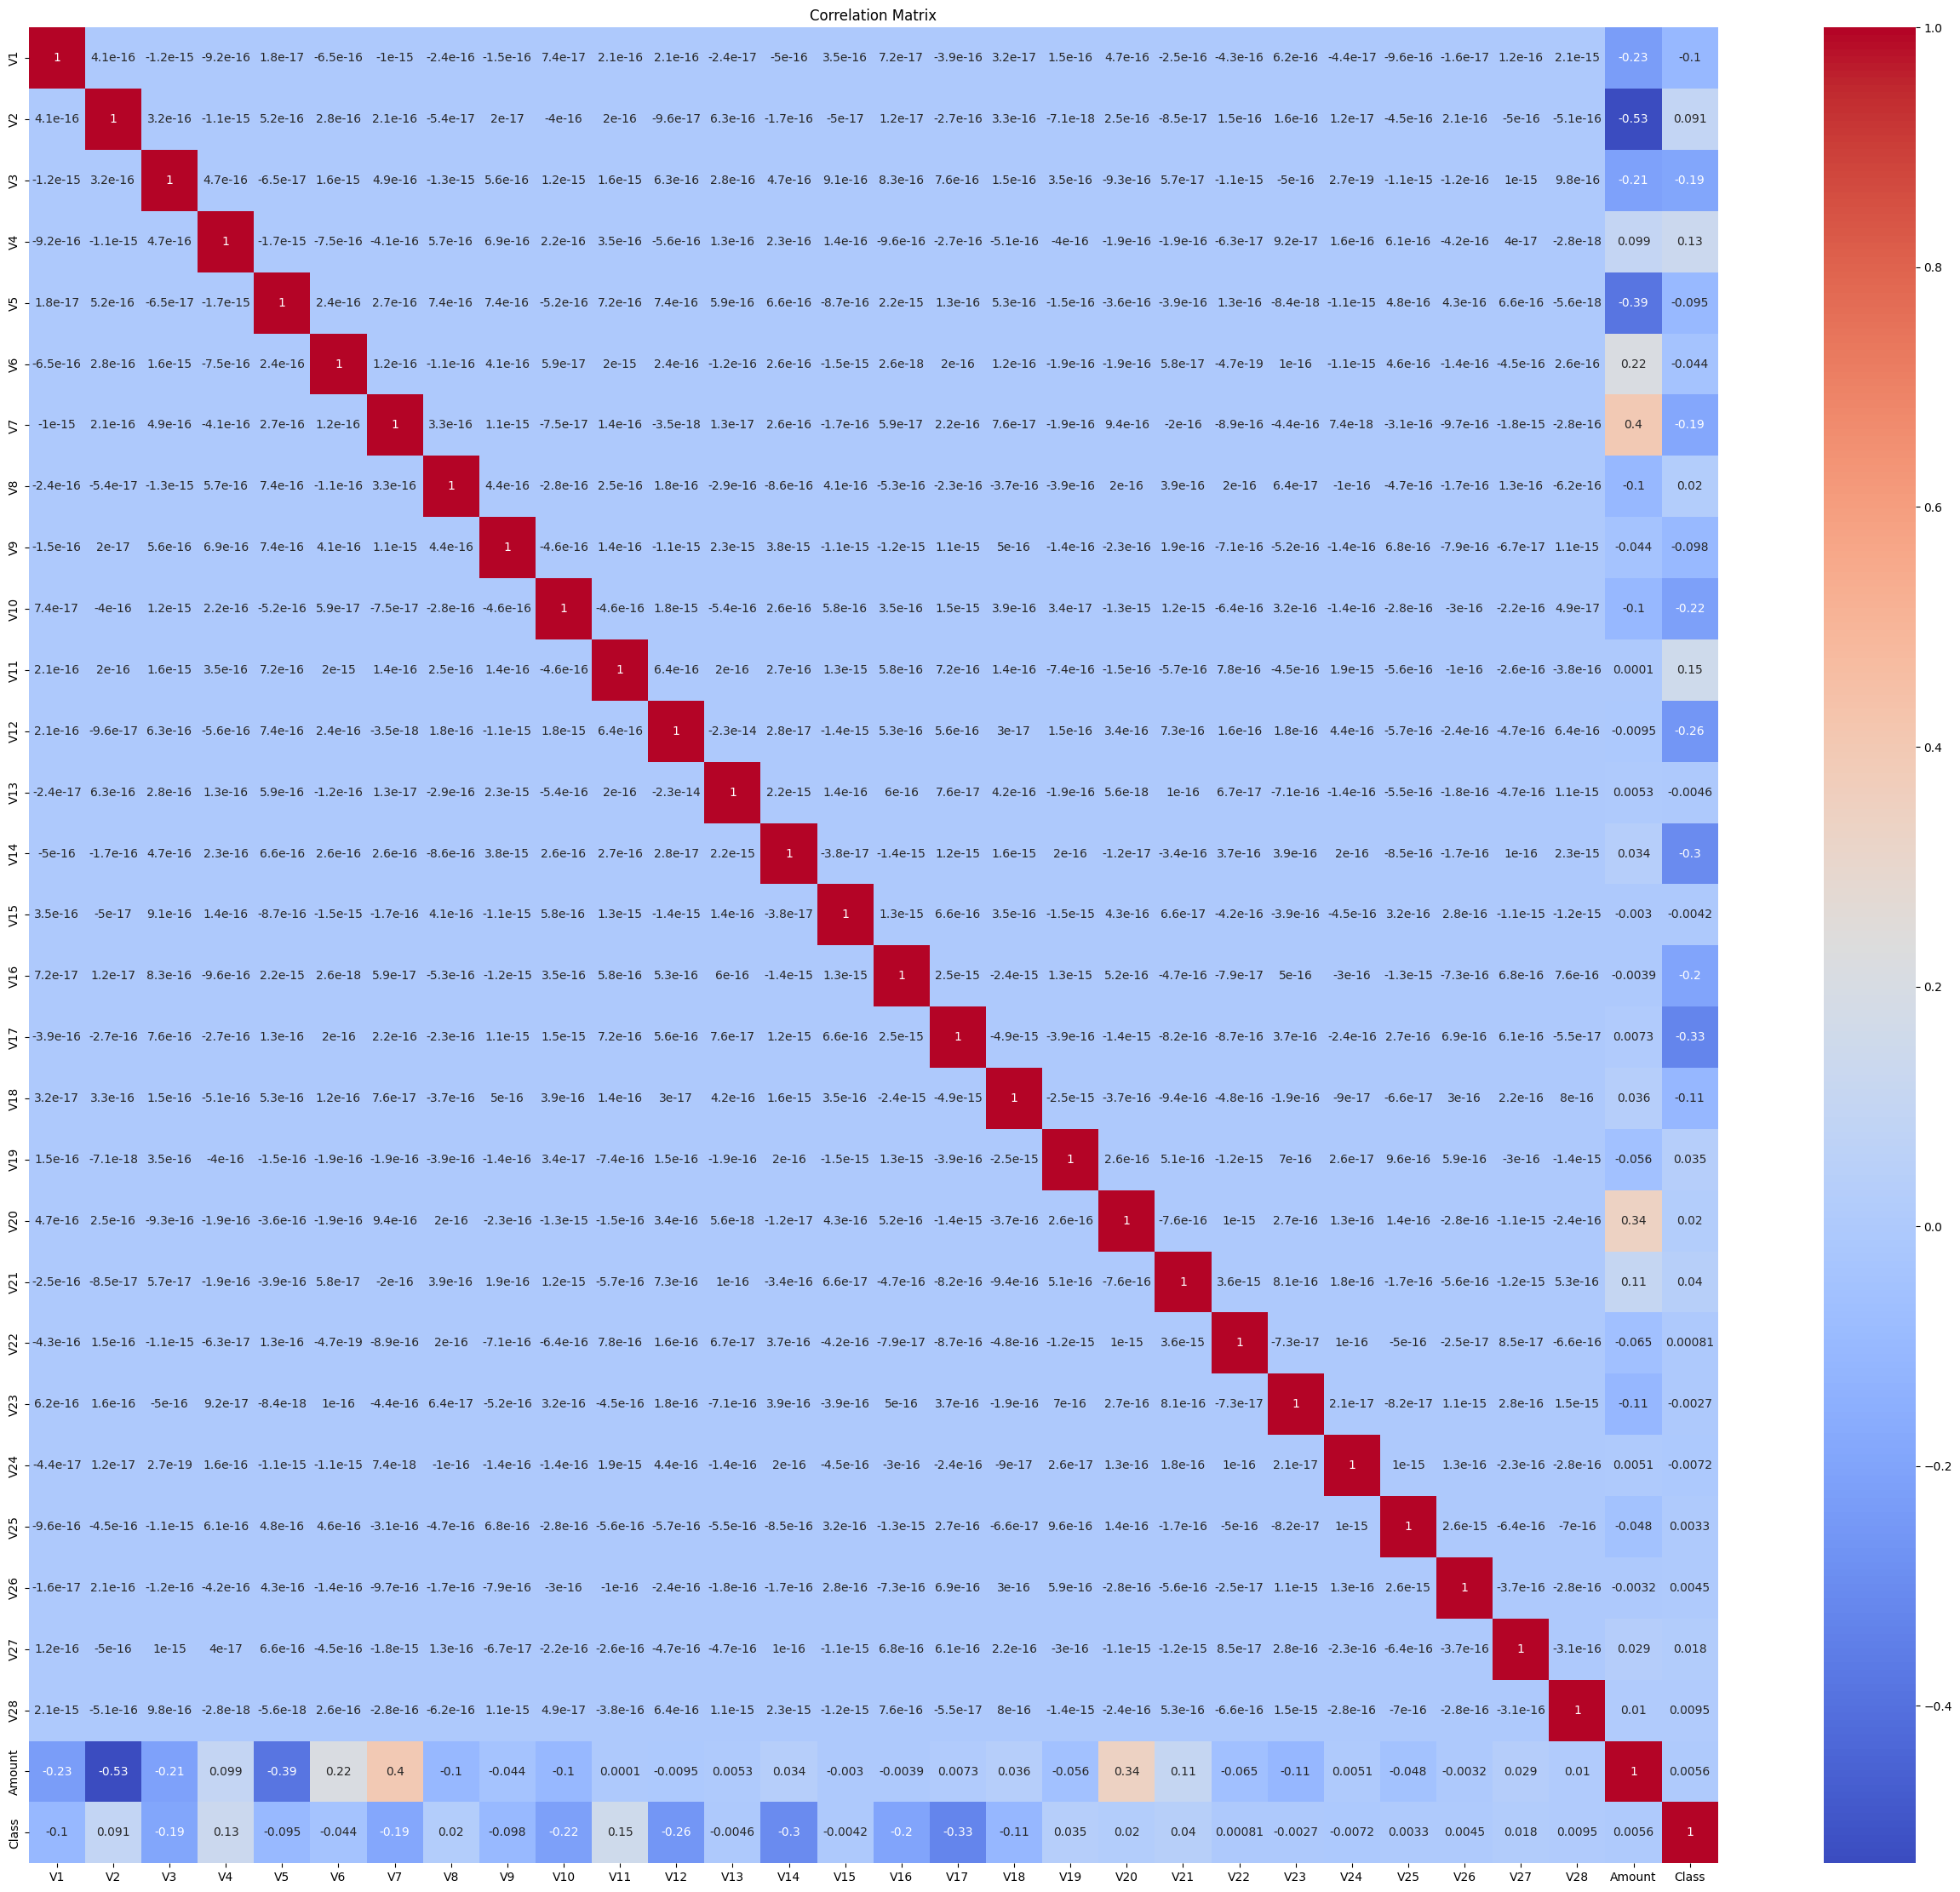

In [ ]:
# Correlation matrix
plt.figure(figsize=(32, 28))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import numpy as np
from collections import Counter

def IQR_method(data, n, features):

    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(data[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_list_column = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index.tolist()

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list(k for k, v in outlier_list.items() if v > n)

    print('Detected Outliers:', len(multiple_outliers))

    return multiple_outliers

# detecting outliers
Outliers_IQR = IQR_method(data, 1, numeric_columns)
# dropping outliers
data_out = data.drop(Outliers_IQR, axis=0).reset_index(drop=True)


Detected Outliers: 81430


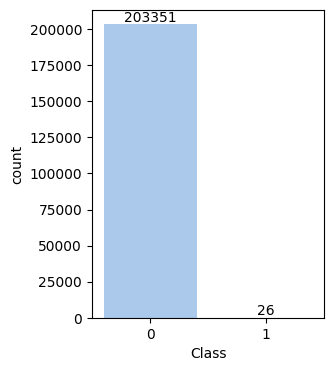

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=data_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

# **Step 6: Define Features and Target Variable**
Description: Separate the features (independent variables) from the target variable (dependent variable).

In [ ]:
# Define features and target variable
X = data.drop('Class', axis=1)  # Features (assuming 'Class' is the target variable)
y = data['Class']                # Target variable

# **Step 7: Split the Dataset**
Description: Split the dataset into training and testing sets (80/20 split).

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Handle Imbalanced Dataset using SMOTE**
Description: Apply SMOTE to balance the training dataset, as fraudulent transactions are often much fewer than legitimate ones.

In [ ]:
# Handle the imbalanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = xgb_clf.predict(X_train)

# Print Train results
print("Train Result:")
print("=" * 50)

# Calculate and print Accuracy Score
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Score: {train_accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
train_report = classification_report(y_train, y_train_pred)
print(train_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\n" + "=" * 50)

# Testing phase
# Make predictions on the test data
y_test_pred = xgb_clf.predict(X_test)

# Print Test results
print("Test Result:")
print("=" * 50)

# Calculate and print Accuracy Score
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Score: {test_accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
test_report = classification_report(y_test, y_test_pred)
print(test_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Store scores in a dictionary
scores_dict = {
    'XGBoost': {
        'Train': f1_score(y_train, y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
    }
}

# Print the scores dictionary
print("\nScores Dictionary:")
print(scores_dict)


Train Result:
Accuracy Score: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Confusion Matrix:
[[227451      0]
 [     0    394]]

Test Result:
Accuracy Score: 99.96%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56862     2]
 [   20    78]]

Scores Dictionary:
{'XGBoost': {'Train': 1.0, 'Test': 0.8764044943820225}}


# **LightGBM**

In [ ]:
# prompt: give me code form LightGBM

from lightgbm import LGBMClassifier


lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = lgbm_clf.predict(X_train)

# Print Train results
print("Train Result:")
print("=" * 50)

# Calculate and print Accuracy Score
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Score: {train_accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
train_report = classification_report(y_train, y_train_pred)
print(train_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\n" + "=" * 50)

# Testing phase
# Make predictions on the test data
y_test_pred = lgbm_clf.predict(X_test)

# Print Test results
print("Test Result:")
print("=" * 50)

# Calculate and print Accuracy Score
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Score: {test_accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
test_report = classification_report(y_test, y_test_pred)
print(test_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Store scores in the dictionary
scores_dict['LightGBM'] = {
    'Train': f1_score(y_train, y_train_pred),
    'Test': f1_score(y_test, y_test_pred),
}

# Print the scores dictionary
print("\nScores Dictionary:")
print(scores_dict)


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
Train Result:
Accuracy Score: 99.70%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.24      0.34      0.28       394

    accuracy                           1.00    227845
   macro avg       0.62      0.67      0.64    227845
weighted avg       1.00      1.00      1.00    227845

Confusion Matrix:
[[227023    428]
 [   260    134]]

Test Result:
Accuracy Score: 99.61%
Classification Report:
      

# **CatBoost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(random_state=42, verbose=0)
catboost_clf.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = catboost_clf.predict(X_train)

# Print Train results
print("Train Result:")
print("=" * 50)

# Calculate and print Accuracy Score
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Score: {train_accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
train_report = classification_report(y_train, y_train_pred)
print(train_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\n" + "=" * 50)

# Testing phase
# Make predictions on the test data
y_test_pred = catboost_clf.predict(X_test)

# Print Test results
print("Test Result:")
print("=" * 50)

# Calculate and print Accuracy Score
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Score: {test_accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
test_report = classification_report(y_test, y_test_pred)
print(test_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Store scores in the dictionary
scores_dict['CatBoost'] = {
    'Train': f1_score(y_train, y_train_pred),
    'Test': f1_score(y_test, y_test_pred),
}

# Print the scores dictionary
print("\nScores Dictionary:")
print(scores_dict)


Train Result:
Accuracy Score: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Confusion Matrix:
[[227451      0]
 [     1    393]]

Test Result:
Accuracy Score: 99.96%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56862     2]
 [   20    78]]

Scores Dictionary:
{'XGBoost': {'Train': 1.0, 'Test': 0.8764044943820225}, 'LightGBM': {'Train': 0.2803347280334728, 'Test

# **Model Comparasion**

<Axes: >

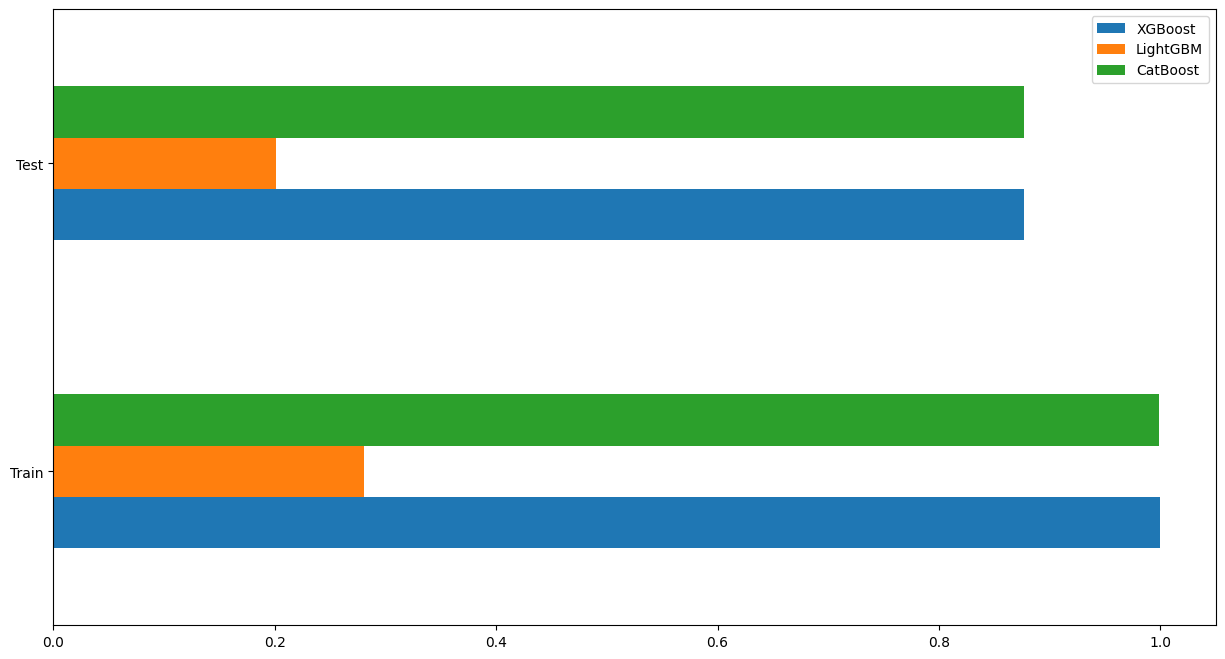

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Training score ", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Training score  100.0 % accuracy score
Classifiers:  KNeighborsClassifier Training score  100.0 % accuracy score
Classifiers:  SVC Training score  100.0 % accuracy score
Classifiers:  DecisionTreeClassifier Training score  100.0 % accuracy score
